In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\lenovo\Desktop\creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [9]:

df.drop(['Time'], axis=1, inplace=True)


In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
df.duplicated().any()

True

In [12]:
data=df.drop_duplicates()

In [13]:
data.shape

(275663, 30)

In [14]:
data["Class"].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

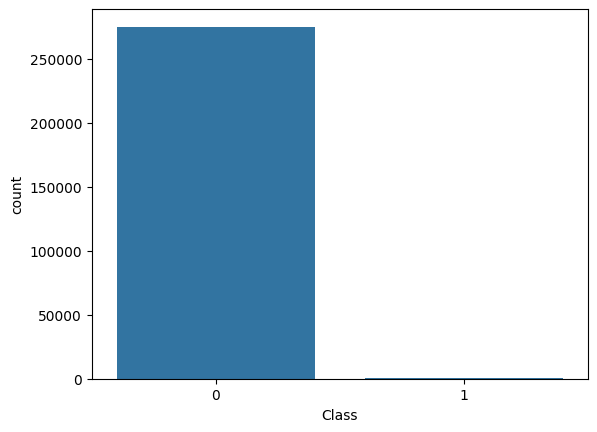

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is your DataFrame and 'Class' is the column you want to plot
sns.countplot(data=data, x='Class')
plt.show()

In [16]:
X=data.drop(['Class'], axis=1)
y=data['Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [18]:
classifier={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}


for name, clf in classifier.items():
    print(f"\n======{name}============")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"\n Accuracy:{accuracy_score(y_test, y_pred)}")
    print(f"\n precision:{precision_score(y_test, y_pred)}")
    print(f"\n recall:{recall_score(y_test, y_pred)}")
    print(f"\n F1 Score:{f1_score(y_test, y_pred)}")


======Logistic Regression============

 Accuracy:0.9992019269835742

 precision:0.8571428571428571

 recall:0.6

 F1 Score:0.7058823529411765

======Decision Tree Classifier============

 Accuracy:0.9989842707063672

 precision:0.6515151515151515

 recall:0.7818181818181819

 F1 Score:0.7107438016528925


In [19]:
normal=data[data['Class']==0]
fraud=data[data['Class']==1]

In [20]:
normal.shape

(275190, 30)

In [21]:
fraud.shape

(473, 30)

In [22]:
normal_sample=normal.sample(n=473)

In [23]:
normal_sample.shape

(473, 30)

In [24]:
new_data=pd.concat([normal_sample,fraud], ignore_index=True)

In [25]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.583531,0.373357,2.513426,1.804105,-0.533195,-0.239007,-0.091377,0.165603,-0.539560,0.177246,...,0.136816,0.309619,0.210457,0.759968,-0.891358,0.868504,0.102601,0.179001,-0.162881,0
1,1.925356,-0.212472,-1.183233,0.240970,0.489568,0.345401,-0.068951,0.119001,0.536430,-0.069409,...,-0.203596,-0.341830,0.427666,-1.033932,-0.526936,0.296023,-0.017670,-0.071528,-0.342914,0
2,-1.116624,-0.113825,1.164706,1.068759,0.542018,-0.345515,1.195639,-0.358953,-0.431803,0.013537,...,0.088867,0.724697,0.636660,0.082587,-0.162984,-0.313841,0.039563,-0.157153,0.150529,0
3,-0.907315,0.235089,0.131163,-3.218814,0.253253,-1.180344,0.459255,0.288276,0.873418,-2.321338,...,0.138398,0.340119,-0.441147,-0.292429,0.896069,-0.795242,-0.089956,-0.129984,-0.287461,0
4,-1.947149,1.165236,1.506171,0.028594,-1.601367,0.097709,-0.530371,0.201612,-0.340353,1.353940,...,-0.036307,0.176757,0.218080,0.555593,-1.094398,-0.734309,-1.663790,-0.317280,-0.209298,0


In [26]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [27]:
x=new_data.drop('Class',axis=1)
y=new_data['Class']

In [28]:
print(len(X))
print(len(y))


275663
946


In [29]:
min_length = min(len(X), len(y))
X = X[:min_length]
y = y[:min_length]


In [30]:
# Ensure X and y have the same length
if len(X) != len(y):
    raise ValueError(f"X and y have different lengths: {len(X)} and {len(y)}")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
classifier={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}


for name, clf in classifier.items():
    print(f"\n======{name}============")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"\n Accuracy:{accuracy_score(y_test, y_pred)}")
    print(f"\n precision:{precision_score(y_test, y_pred)}")
    print(f"\n recall:{recall_score(y_test, y_pred)}")
    print(f"\n F1 Score:{f1_score(y_test, y_pred)}")


======Logistic Regression============

 Accuracy:0.48947368421052634

 precision:0.5301204819277109

 recall:0.43137254901960786

 F1 Score:0.4756756756756757

======Decision Tree Classifier============

 Accuracy:0.5105263157894737

 precision:0.5436893203883495

 recall:0.5490196078431373

 F1 Score:0.5463414634146342


In [32]:
X=data.drop(['Class'], axis=1)
y=data['Class']

In [33]:
X.shape

(275663, 29)

In [34]:
y.shape

(275663,)

In [35]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imbalanced-learn in c:\users\lenovo\appdata\local\programs\python\python312\lib\site-packages (0.12.3)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [39]:
classifier={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}


for name, clf in classifier.items():
    print(f"\n======{name}============")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"\n Accuracy:{accuracy_score(y_test, y_pred)}")
    print(f"\n precision:{precision_score(y_test, y_pred)}")
    print(f"\n recall:{recall_score(y_test, y_pred)}")
    print(f"\n F1 Score:{f1_score(y_test, y_pred)}")


======Logistic Regression============

 Accuracy:0.9449761982630183

 precision:0.9733956164637825

 recall:0.9149341397458638

 F1 Score:0.9432599132148719

======Decision Tree Classifier============

 Accuracy:0.9983066245139721

 precision:0.9976478445835087

 recall:0.9989677531912419

 F1 Score:0.9983073626094221


In [40]:
dtc=DecisionTreeClassifier()
dtc.fit(X_res,y_res)

DecisionTreeClassifier()

In [41]:
import joblib

In [42]:
joblib.dump(dtc,'credit_card_model.pkl')

['credit_card_model.pkl']

In [43]:
model=joblib.load('credit_card_model.pkl')

In [44]:
pred=model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [45]:
pred[0]

0

In [46]:
if pred[0] == 0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Normal Transcation
